# Credit Card Fraud Detection using Nueral Networks: Anthony Poon, Evan Perez, Jonathan Shields

# CUNY Tech Prep Data Science Cohort 9


Data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CTP_data/FRAUD/Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Testing isFlaggedFraud

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(df['isFraud'], df['isFlaggedFraud'])
precision = precision_score(df['isFraud'], df['isFlaggedFraud'])
recall = recall_score(df['isFraud'], df['isFlaggedFraud'])
f1 = f1_score(df['isFraud'], df['isFlaggedFraud'])


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

KeyboardInterrupt: 

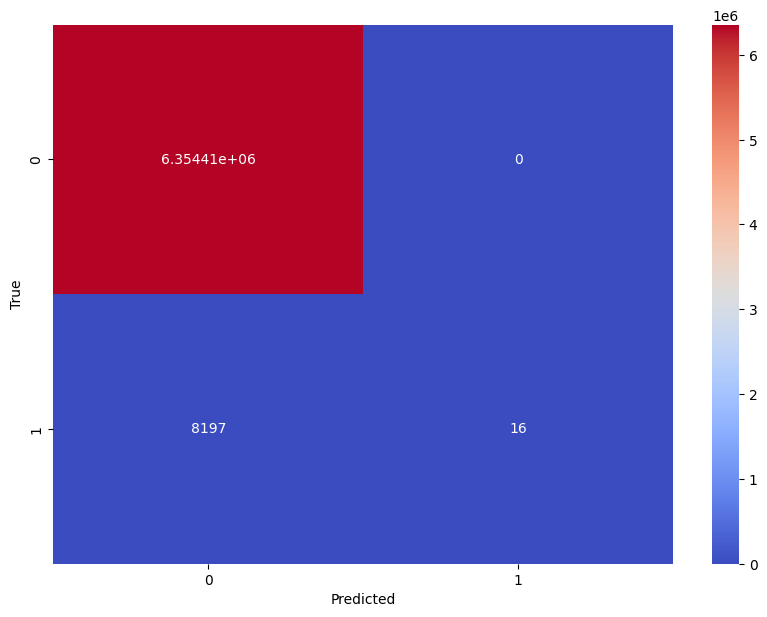

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

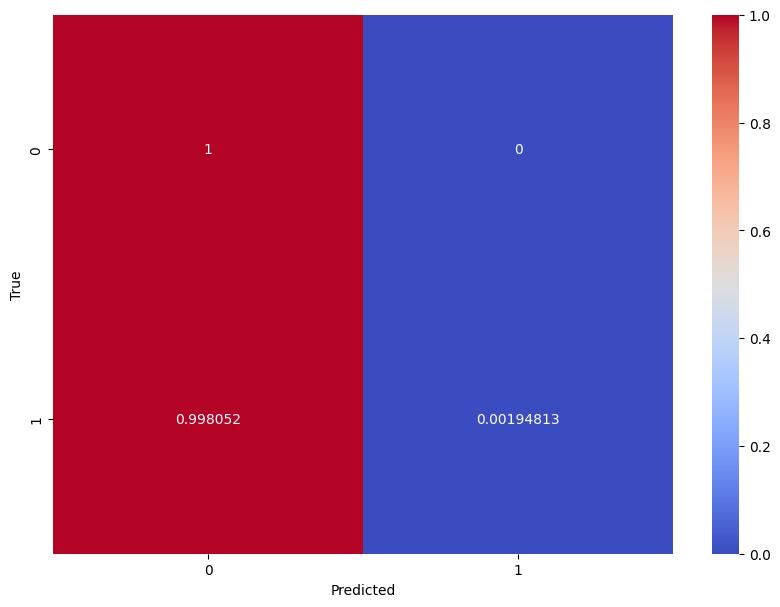

In [ ]:
cm_normalized = confusion_matrix(df['isFraud'], df['isFlaggedFraud'], normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Percent Change Feature

In [ ]:
import numpy as np

df["per_change"] = ((df["newbalanceOrig"] - df["oldbalanceOrg"])/(df["oldbalanceOrg"]))
df["per_change"] = pd.Series(np.where(df["oldbalanceOrg"] == 0.0,0,df["per_change"]))

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,per_change
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-0.057834
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-0.087735
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-1.000000
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-1.000000
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-0.280795


# Dropping Features

Using a correlation matrix!!

<ipython-input-8-08eba48542e5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[df.columns].corr()


<AxesSubplot: >

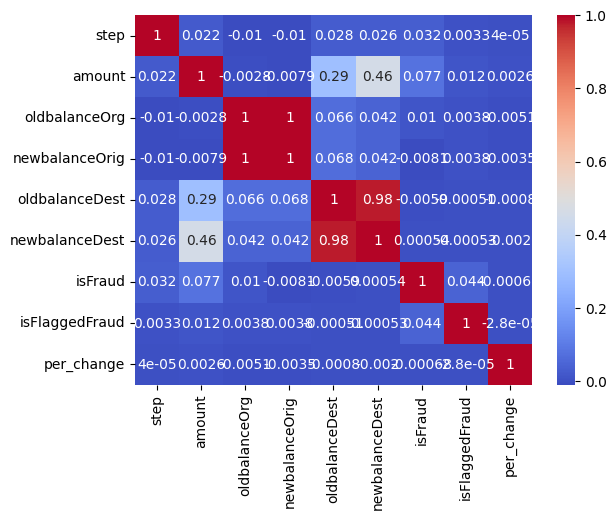

In [ ]:
import seaborn as sns

corr_matrix = df[df.columns].corr()
sns.heatmap(data=corr_matrix, annot=True,cmap='coolwarm')

In [ ]:
df.drop(columns=['isFlaggedFraud','oldbalanceOrg', 'oldbalanceDest','nameOrig','nameDest'], axis=1, inplace=True)
df.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,per_change
0,1,PAYMENT,9839.64,160296.36,0.0,0,-0.057834
1,1,PAYMENT,1864.28,19384.72,0.0,0,-0.087735
2,1,TRANSFER,181.00,0.00,0.0,1,-1.000000
3,1,CASH_OUT,181.00,0.00,0.0,1,-1.000000
4,1,PAYMENT,11668.14,29885.86,0.0,0,-0.280795


In [ ]:
df = pd.get_dummies(df, columns=['type'], prefix=['type'])

# Outliers

In [ ]:
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: newbalanceOrig, Percentage of outliers: 16.56%
Column: newbalanceDest, Percentage of outliers: 11.61%
Column: isFraud, Percentage of outliers: 0.13%
Column: per_change, Percentage of outliers: 6.95%


In [ ]:
# removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df['newbalanceOrig'])
df['newbalanceOrig']=np.where(df['newbalanceOrig']>high_leadtime,high_leadtime,df['newbalanceOrig'])
df['newbalanceOrig']=np.where(df['newbalanceOrig']<low_leadtime,low_leadtime,df['newbalanceOrig'])

low_leadtime,high_leadtime=remove_outlier(df['newbalanceDest'])
df['newbalanceDest']=np.where(df['newbalanceDest']>high_leadtime,high_leadtime,df['newbalanceDest'])
df['newbalanceDest']=np.where(df['newbalanceDest']<low_leadtime,low_leadtime,df['newbalanceDest'])


In [ ]:
# Removing outliers from the 'per_change' column
low_threshold, high_threshold = remove_outlier(df['per_change'])

# Capping the values at the high threshold
df['per_change'] = np.where(df['per_change'] > high_threshold, high_threshold, df['per_change'])

# Raising the values at the low threshold
df['per_change'] = np.where(df['per_change'] < low_threshold, low_threshold, df['per_change'])

([<matplotlib.patches.Wedge at 0x79de02fb82b0>,
 [Text(-1.099990955625572, 0.004460666087110192, ''),
  Text(1.0999909559371663, -0.004460589247970448, '')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87'),
  Text(0.599995066874818, -0.002433048680711153, '0.13')])

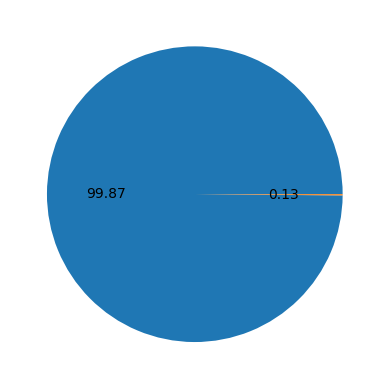

In [ ]:
import matplotlib.pyplot as plt

#percentage of fraudulent transactions is highly is balanced
plt.pie(df['isFraud'].value_counts(), autopct='%.2f')

# Adjusting Data

In [ ]:
pd.set_option('display.max_rows', None)

original_df = df
#Choose a random sample of 600k
df = df.sample(n=600000, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('isFraud', axis=1)
y = df['isFraud']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X,y = smote.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#turns 25% of the training data into validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train.head()

,step,amount,newbalanceOrig,newbalanceDest,per_change,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
133160,136,1.608906e+05,0.0,6.133638e+05,0.0,0,1,0,0,0
710913,632,1.604190e+05,0.0,4.546076e+05,-1.0,0,1,0,0,0
1198191,156,7.490180e+05,0.0,1.103234e+06,-1.0,0,1,0,0,0
1196928,374,1.230579e+06,0.0,1.333576e+06,-1.0,0,1,0,0,0
285161,590,1.885685e+06,0.0,2.779773e+06,-1.0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Normalizes x data

scaler  = MinMaxScaler()
pycaret_data = X_train
X_train = scaler.fit_transform(X_train)
pycaret_data[pycaret_data.columns] = X_train
X_val   = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(X_train)

# when saving the model, use joblib dump and joblib load to save and load scaler

[[1.82186235e-01 2.50473982e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.51551957e-01 2.49739826e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.09176788e-01 1.16606901e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.22807018e-01 1.47794387e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.21187584e-01 2.82323302e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.61268556e-01 1.10660356e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


# PyCaret

In [ ]:
!pip install scipy

In [ ]:
!pip install pycaret[full]
from pycaret.classification import *

In [ ]:
pycaret_data = pycaret_data.merge(y_train, left_index=True, right_index=True)
pycaret_data.head()

In [ ]:
setup_data = setup(data=pycaret_data,target='isFraud',session_id=42,remove_outliers=True, data_split_stratify=True, use_gpu=True)

In [ ]:
models = compare_models(n_select=3)
models

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:46:01
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9911,0.9994,0.9960,0.9864,0.9912,0.9823,0.9823,68.6990
dt,Decision Tree Classifier,0.9876,0.9876,0.9913,0.9840,0.9876,0.9752,0.9752,26.0080
knn,K Neighbors Classifier,0.9661,0.9859,0.9655,0.9666,0.9661,0.9322,0.9322,65.4520
ada,Ada Boost Classifier,0.9413,0.9891,0.9415,0.9412,0.9413,0.8826,0.8826,39.4230
lr,Logistic Regression,0.9065,0.9678,0.9684,0.8617,0.9120,0.8130,0.8193,33.2740
ridge,Ridge Classifier,0.8998,0.0000,0.9921,0.8375,0.9083,0.7996,0.8136,23.7480
nb,Naive Bayes,0.8954,0.9330,0.9838,0.8361,0.9039,0.7909,0.8035,24.1390
svm,SVM - Linear Kernel,0.8947,0.0000,0.9830,0.8354,0.9032,0.7894,0.8020,24.8230
qda,Quadratic Discriminant Analysis,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000,23.8090


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

# Neural Network

In [ ]:
# Parameters
#//////////////////////
learning_rate = 0.001
epochs = 200
batch_size = 64
#/////////////////////

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU

model = Sequential([
    Dense(units=10, input_shape=(X_train.shape[-1],)),
    LeakyReLU(alpha=0.01),  # LeakyReLU after the first Dense layer

    Dense(units=20),
    LeakyReLU(alpha=0.01),  # LeakyReLU after the second Dense layer

    Dense(units=150),
    LeakyReLU(alpha=0.01),  # LeakyReLU after the third Dense layer

    Dropout(0.1),  # Dropout layer remains the same

    Dense(units=20),
    LeakyReLU(alpha=0.01),  # LeakyReLU after the fourth Dense layer

    Dense(units=2, activation='sigmoid')  # Output layer
])
# Summary of the model
model.summary()

In [ ]:
from tensorflow import keras
# Compile the model with an optimizer

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,  ModelCheckpoint

# Define the learning rate reduction callback
lr_reduction = ReduceLROnPlateau(
    monitor="val_loss",  # metric to monitor
    factor=0.1,  # factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,  # number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7,  # lower bound on the learning rate
    verbose=1,  # verbosity mode
)

early_stopping = EarlyStopping(
    min_delta = 0.0002, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    restore_best_weights=True,
)

model_checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/',
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_val, y_val),
          verbose=1,
          callbacks=[lr_reduction, early_stopping, model_checkpoint])

In [ ]:
final = model.predict(X_test)
y_pred = (final > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9762240504639209
Precision: 0.9673178553314027
Recall: 0.9857937255621233
F1 Score: 0.976468402254475


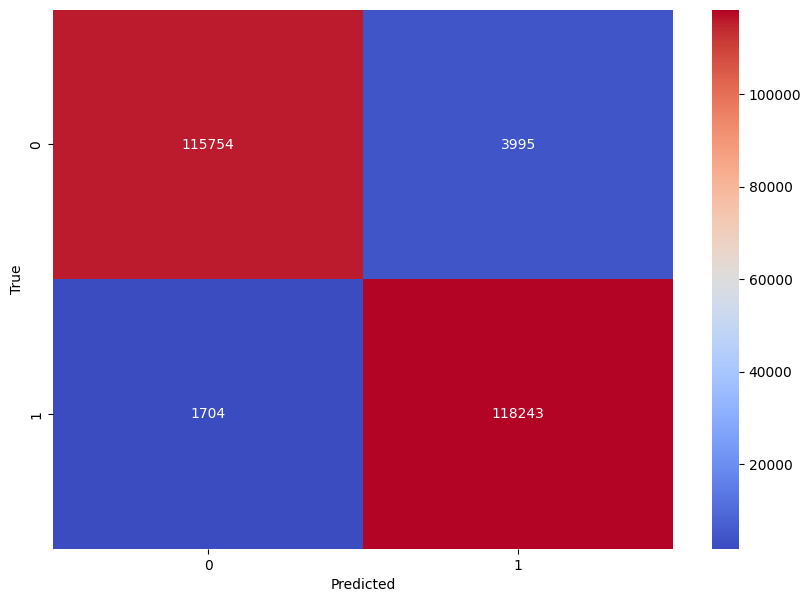

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

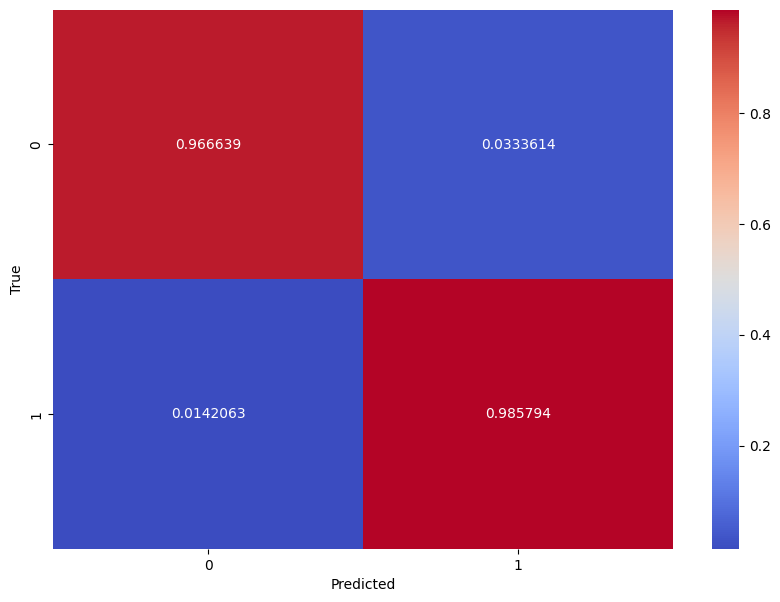

In [ ]:
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import pickle

model.save('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/final.keras')
pickle.dump(scaler, open('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/finalScaler.pkl', 'wb'))

In [ ]:
import json

# Assuming 'history' is a History object
history_dict = history.history

# Define a custom encoder function
def json_encoder(obj):
    if isinstance(obj, np.float32):
        return float(obj)
    raise TypeError(f"Object of type {type(obj)} is not JSON serializable")

# Convert the history dictionary to a JSON string using the custom encoder
history_str = json.dumps(history_dict, default=json_encoder)

# Write the JSON string to the file
with open('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/firstFinalHistory.txt', 'w') as file:
    file.write(history_str)


# Test on full dataset

In [ ]:
from tensorflow.keras.models import load_model
import pickle

# Load the model
loaded_model = load_model('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/final.keras')
loaded_scaler = pickle.load(open('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/finalScaler.pkl','rb'))

In [ ]:
!pip freeze > /content/drive/MyDrive/CTP_FRAUD_STORAGE/requirements.txt

In [ ]:
# Use original_df as df
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X = loaded_scaler.transform(X)

In [ ]:
final = loaded_model.predict(X)
y_pred = (final > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
cm_normalized = confusion_matrix(y, y_pred, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Graphs

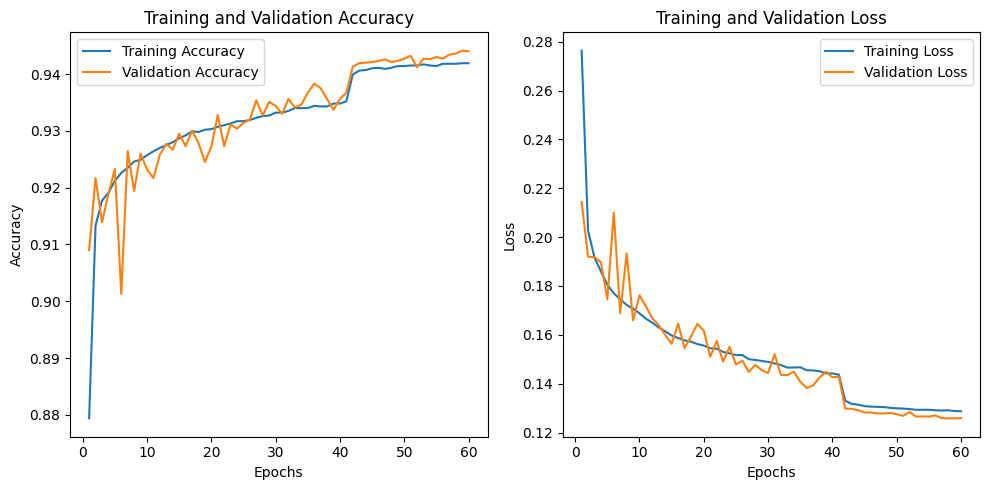

In [ ]:
import matplotlib.pyplot as plt

# Define the data
epochs = range(1, 61)
train_accuracy = [0.8794, 0.9133, 0.9177, 0.9191, 0.9212, 0.9226, 0.9235, 0.9246, 0.9249, 0.9257,
                  0.9264, 0.9270, 0.9275, 0.9280, 0.9287, 0.9292, 0.9299, 0.9298, 0.9302, 0.9303,
                  0.9307, 0.9310, 0.9313, 0.9317, 0.9317, 0.9319, 0.9323, 0.9326, 0.9327, 0.9332,
                  0.9332, 0.9335, 0.9340, 0.9340, 0.9340, 0.9344, 0.9343, 0.9343, 0.9348, 0.9348,
                  0.9352, 0.9399, 0.9406, 0.9407, 0.9410, 0.9411, 0.9409, 0.9411, 0.9414, 0.9414,
                  0.9415, 0.9415, 0.9417, 0.9415, 0.9414, 0.9418, 0.9418, 0.9418, 0.9419, 0.9419]
val_accuracy = [0.9090, 0.9217, 0.9139, 0.9189, 0.9233, 0.9013, 0.9264, 0.9194, 0.9260, 0.9232,
                0.9217, 0.9258, 0.9277, 0.9267, 0.9295, 0.9273, 0.9300, 0.9279, 0.9245, 0.9272,
                0.9328, 0.9273, 0.9311, 0.9304, 0.9314, 0.9320, 0.9354, 0.9327, 0.9351, 0.9344,
                0.9330, 0.9356, 0.9341, 0.9346, 0.9367, 0.9383, 0.9375, 0.9356, 0.9337, 0.9356,
                0.9367, 0.9413, 0.9419, 0.9420, 0.9421, 0.9423, 0.9426, 0.9421, 0.9423, 0.9427,
                0.9432, 0.9412, 0.9427, 0.9426, 0.9430, 0.9427, 0.9434, 0.9436, 0.9441, 0.9440]


train_loss = [0.2763, 0.2027, 0.1916, 0.1860, 0.1805, 0.1770, 0.1746, 0.1722, 0.1707, 0.1688,
              0.1666, 0.1649, 0.1630, 0.1614, 0.1597, 0.1587, 0.1577, 0.1572, 0.1562, 0.1556,
              0.1545, 0.1543, 0.1530, 0.1524, 0.1517, 0.1517, 0.1500, 0.1497, 0.1493, 0.1489,
              0.1483, 0.1476, 0.1466, 0.1466, 0.1467, 0.1455, 0.1454, 0.1451, 0.1442, 0.1442,
              0.1437, 0.1330, 0.1317, 0.1314, 0.1308, 0.1306, 0.1305, 0.1304, 0.1301, 0.1299,
              0.1298, 0.1296, 0.1293, 0.1293, 0.1293, 0.1291, 0.1290, 0.1291, 0.1288, 0.1287]
val_loss = [0.2144, 0.1920, 0.1918, 0.1897, 0.1745, 0.2100, 0.1689, 0.1933, 0.1659, 0.1762,
            0.1716, 0.1667, 0.1639, 0.1599, 0.1563, 0.1646, 0.1546, 0.1592, 0.1645, 0.1617,
            0.1510, 0.1575, 0.1490, 0.1551, 0.1478, 0.1494, 0.1448, 0.1477, 0.1455, 0.1444,
            0.1520, 0.1436, 0.1435, 0.1449, 0.1408, 0.1382, 0.1393, 0.1425, 0.1449, 0.1426,
            0.1429, 0.1298, 0.1297, 0.1291, 0.1282, 0.1282, 0.1278, 0.1278, 0.1280, 0.1275,
            0.1268, 0.1284, 0.1265, 0.1266, 0.1265, 0.1270, 0.1259, 0.1258, 0.1258, 0.1259]


# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
